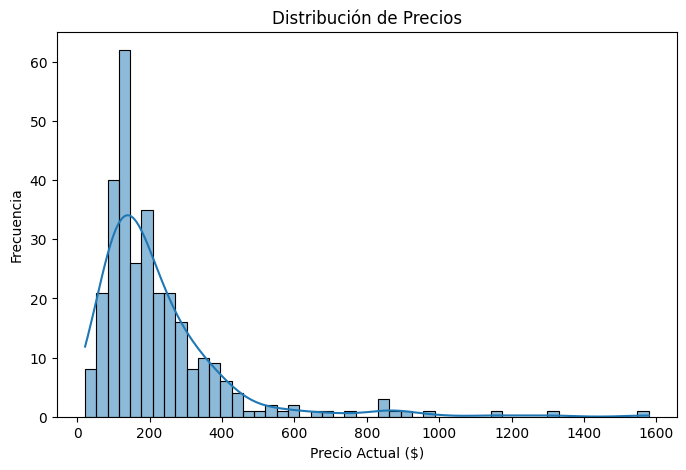

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos desde CSV
data = pd.read_csv("temp.csv")

# Eliminar filas con valores nulos en columnas clave
data = data.dropna()

data = data[data["Memoria RAM"] != 128.0]


# Convertir tipos de datos
data["Ano del modelo"] = data["Ano del modelo"].astype(int)
data["Capacidad de almacenamiento digital"] = data["Capacidad de almacenamiento digital"].astype(float)
data["Memoria RAM"] = data["Memoria RAM"].astype(float)
data["Potencia nominal de la bateria"] = data["Potencia nominal de la bateria"].astype(float)
data["precio_actual"] = data["precio_actual"].astype(float)

# 1. Histograma de precios
plt.figure(figsize=(8,5))
sns.histplot(data["precio_actual"], bins=50, kde=True)
plt.title("Distribución de Precios")
plt.xlabel("Precio Actual ($)")
plt.ylabel("Frecuencia")
plt.show()


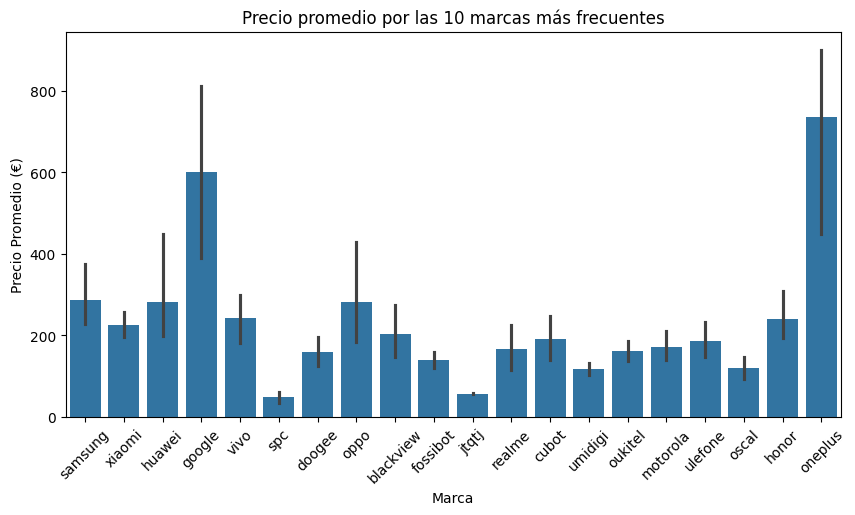

In [58]:

# 2. Precio promedio por marca (top 10 marcas más frecuentes)
top_marcas = data["Marca"].value_counts().index[:20]
data_top_marcas = data[data["Marca"].isin(top_marcas)]
plt.figure(figsize=(10,5))
sns.barplot(x=data_top_marcas["Marca"], y=data_top_marcas["precio_actual"], estimator=lambda x: x.mean())
plt.xticks(rotation=45)
plt.title("Precio promedio por las 10 marcas más frecuentes")
plt.xlabel("Marca")
plt.ylabel("Precio Promedio (€)")
plt.show()



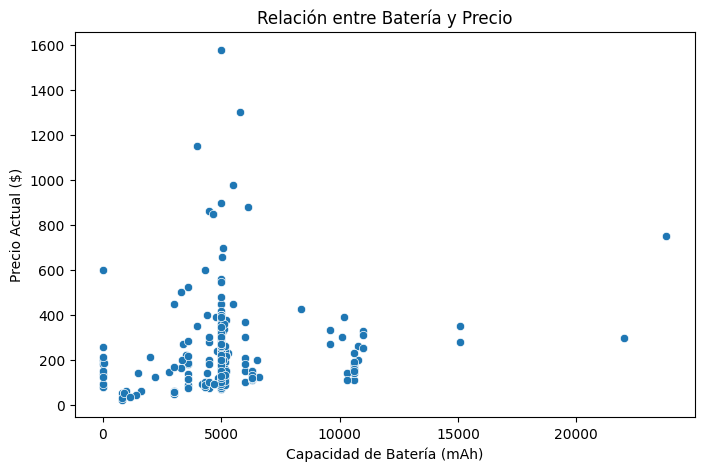

In [59]:
# 3. Relación entre batería y precio
plt.figure(figsize=(8,5))
sns.scatterplot(x=data["Potencia nominal de la bateria"], y=data["precio_actual"])
plt.title("Relación entre Batería y Precio")
plt.xlabel("Capacidad de Batería (mAh)")
plt.ylabel("Precio Actual ($)")
plt.show()

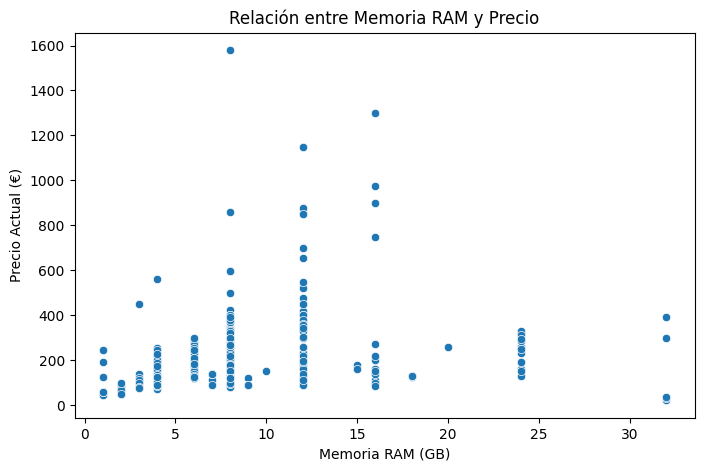

In [60]:
# 4. Relación entre memoria RAM y precio
plt.figure(figsize=(8,5))
sns.scatterplot(x=data["Memoria RAM"], y=data["precio_actual"])
plt.title("Relación entre Memoria RAM y Precio")
plt.xlabel("Memoria RAM (GB)")
plt.ylabel("Precio Actual (€)")
plt.show()

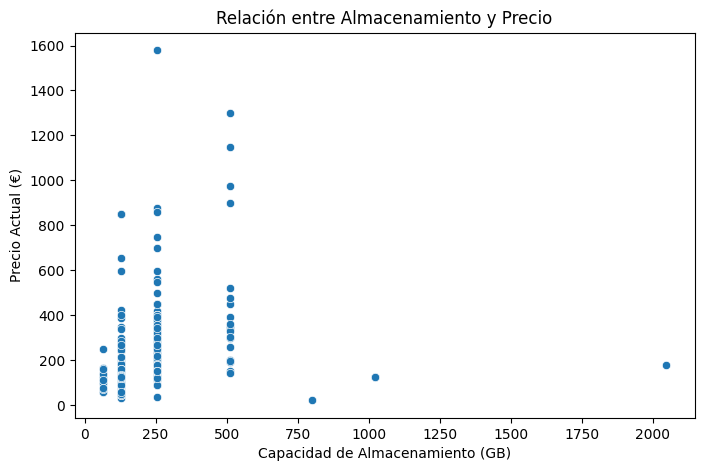

In [61]:
# 5. Relación entre almacenamiento digital y precio
plt.figure(figsize=(8,5))
sns.scatterplot(x=data["Capacidad de almacenamiento digital"], y=data["precio_actual"])
plt.title("Relación entre Almacenamiento y Precio")
plt.xlabel("Capacidad de Almacenamiento (GB)")
plt.ylabel("Precio Actual (€)")
plt.show()

In [87]:
# 6. Estadísticas importantes
marca_mas_cara = data.groupby("Marca")["precio_actual"].mean().idxmax()
marca_mas_barata = data.groupby("Marca")["precio_actual"].mean().idxmin()
media_precio = data["precio_actual"].mean()
max_precio = data["precio_actual"].max()
min_precio = data["precio_actual"].min()
ram_max = data["Memoria RAM"].max()
marca_num = data["Marca"].count()

ram_min = data["Memoria RAM"].min()
bat_max = data["Potencia nominal de la bateria"].max()
bat_min = data["Potencia nominal de la bateria"].min()
ano_max = data["Ano del modelo"].max()
ano_min = data["Ano del modelo"].min()

# Guardar estadísticas en un archivo de texto en formato Markdown con emojis
with open('dataset_stats.md', 'w') as file:
    file.write("# Estadísticas del Dataset 📊\n\n")

    file.write("## Tabla 📋\n")
    
    # Filtrar solo columnas con valores nulos
    nulos = data.isnull().sum()
    nulos = nulos[nulos > 0]  # Solo mostrar las columnas con valores nulos
    file.write("**Nulos totales:**\n")
    
    if not nulos.empty:
        for col, count in nulos.items():
            file.write(f"- {col}: {count} nulos\n")
    else:
        file.write("No hay valores nulos en el dataset.\n")
    
    file.write("\n\n")  # Doble salto de línea para separación

    file.write("## Marcas 🏷️\n")
    file.write(f"- **Marcas totales:** {marca_num}\n")
    file.write(f"- **Marca con la media más cara:** {marca_mas_cara}\n")
    file.write(f"- **Marca con la media más barata:** {marca_mas_barata}\n\n")
    
    file.write("## Precios 💸\n")
    file.write(f"- **Precio medio de todos los dispositivos:** {media_precio:.2f}€\n")
    file.write(f"- **Precio máximo registrado:** {max_precio:.2f}€\n")
    file.write(f"- **Precio mínimo registrado:** {min_precio:.2f}€\n\n")
    
    file.write("## Memoria RAM 🧠\n")
    file.write(f"- **Memoria RAM máxima:** {ram_max:.2f} GB\n")
    file.write(f"- **Memoria RAM mínima:** {ram_min:.2f} GB\n\n")
    
    file.write("## Batería 🔋\n")
    file.write(f"- **Batería máxima:** {bat_max:.2f} mAh\n")
    file.write(f"- **Batería mínima:** {bat_min:.2f} mAh\n\n")

    file.write("## Año de Modelo 📅\n")
    file.write(f"- **Año más alto:** {ano_max}\n")
    file.write(f"- **Año más bajo:** {ano_min}\n\n")
    
    # Agregar las características en formato lista
    file.write("## Capacidad de Almacenamiento 👝\n")
    # Capacidad de almacenamiento digital
    capacidad_almacenamiento_max = data["Capacidad de almacenamiento digital"].max()
    capacidad_almacenamiento_min = data["Capacidad de almacenamiento digital"].min()
    file.write(f"- **Capacidad de almacenamiento digital (máxima):** {capacidad_almacenamiento_max} GB\n")
    file.write(f"- **Capacidad de almacenamiento digital (mínima):** {capacidad_almacenamiento_min} GB\n")
    
    file.write("## Pantalla 📺\n")

    # Tamaño de pantalla
    tamano_pantalla_mas_comun = data["Tamano de la pantalla"].mode()[0]
    file.write(f"- **Tamaño de pantalla más común:** {tamano_pantalla_mas_comun} pulgadas\n")

    # Tipo de pantalla
    tipo_pantalla_mas_comun = data["Tipo de pantalla"].mode()[0]
    file.write(f"- **Tipo de pantalla más común:** {tipo_pantalla_mas_comun}\n")
    
    file.write("## Valoraciones ⭐\n")

    # Número de valoraciones
    valoraciones_max = data["numero_valoraciones"].max()
    valoraciones_min = data["numero_valoraciones"].min()
    file.write(f"- **Número máximo de valoraciones:** {valoraciones_max}\n")
    file.write(f"- **Número mínimo de valoraciones:** {valoraciones_min}\n")
    
    # Número de estrellas
    estrellas_max = data["numero_estrellas"].max()
    estrellas_min = data["numero_estrellas"].min()
    file.write(f"- **Número máximo de estrellas:** {estrellas_max}\n")
    file.write(f"- **Número mínimo de estrellas:** {estrellas_min}\n")

    file.write("## Peso 📦\n")

    # Peso
    peso_max = data["Peso (g)"].max()
    peso_min = data["Peso (g)"].min()
    file.write(f"- **Peso máximo (g):** {peso_max}\n")
    file.write(f"- **Peso mínimo (g):** {peso_min}\n")
